About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

**Reminder:** Plagiarism is prohibited. Use of AI without mentioning how and in which parts it was used is also prohibited. If plagiarism or dishonest use of AI is revealed, the assignment is graded with 0.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Let;s work with Titanic dataset again: Download `train.csv` file from https://www.kaggle.com/c/titanic/data?select=train.csv

In [2]:
df = pd.read_csv('train.csv')
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S


In [3]:
df.shape

(891, 12)

# Task 1 (1 point)

Split dataframe into train and test. Set `test_size=0.3, random_state=0`

In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3)

Let's start preprocessing the features:



*   Drop features with $>40%$ missing values and `'PassengerId'`
*   Fill missing values with median (for numerical features) and mode (for categorical features)



In [5]:
for i in df.columns[1:]:
    if df[i].isna().sum()/df.shape[0] > 0.4:
        print(i)

Cabin


In [6]:
df_train.drop(columns=['Cabin', 'PassengerId'], inplace=True)
df_test.drop(columns=['Cabin', 'PassengerId'], inplace=True)

values = {'Survived': df['Survived'].median(),
          'Pclass': df['Pclass'].median(),
          'Name': df['Name'].mode(),
          'Sex': df['Sex'].mode(),
          'Age': df['Age'].median(),
          'SibSp': df['SibSp'].median(),
          'Parch': df['Parch'].median(),
          'Ticket': df['Ticket'].mode(),
          'Fare': df['Fare'].median(),
          'Embarked': df['Embarked'].mode()}
df_train.fillna(values, inplace=True)
df_test.fillna(values, inplace=True)

How many features do we have now? (Do not count `'Survived'` - this will be target)

In [7]:
len(df_test.columns[0])-1

7

# Task 2 (2 points)

Now, let's use one-hot-encoding to encode columns with type `'object'`:



*   Fit the Encoder on train data
*   Apply to train and test
*   Check, how many new features we have

Describe the problems you have faced (hint: one of the problems - `ValueError` and the solution will be to set `handle_unknown` in the `OneHotEncoder`). Explain, why did they occur, which impact may they have  on the training process?

In [8]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(df_train.select_dtypes(include='object')
)

X_train_categorical_encoded = ohe.transform(df_train.select_dtypes(include='object'))
X_test_categorical_encoded = ohe.transform(df_test.select_dtypes(include='object'))

X_train_categorical_encoded.shape

(623, 1136)

In [9]:
df_test.shape

(268, 10)

**Answer**: 4+1132 = 1136 quantitative features.

- the choice of handle_unknown may affect unknown labels in the test dataset. We build the encoder on the training dataset. It may be that some category was not represented in the training data, then we can choose how we will handle the new category during the transformation

- also, we do not have so many new features that it would slow down the work with the data too much, so we will not compress the matrix to sparse


Drop the columns `'Name','Ticket'` and try again.

In [10]:
df_train.drop(columns = ['Name', 'Ticket'], inplace=True)
df_test.drop(columns = ['Name', 'Ticket'], inplace=True)


ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(df_train.select_dtypes(include='object')
)

X_train_categorical_encoded = ohe.transform(df_train.select_dtypes(include='object'))
X_test_categorical_encoded = ohe.transform(df_test.select_dtypes(include='object'))

X_train_categorical_encoded.shape

(623, 5)

Combine numerical features and encoded categorical and split the data into `X` (objects with features) and `y` (target - `Survived` column) for train and test data.

In [11]:
y_train = df_train['Survived']
y_test = df_test['Survived']

X_train = pd.concat((df_train.iloc[:, 2:],
                     pd.DataFrame(X_train_categorical_encoded, columns=ohe.get_feature_names_out(), index=df_train.index)), axis=1)
X_test = pd.concat((df_test.iloc[:, 2:],
                     pd.DataFrame(X_test_categorical_encoded, columns=ohe.get_feature_names_out(), index=df_test.index)), axis=1)

In [12]:
X_train.shape

(623, 11)

In [13]:
X_test.shape

(268, 11)

In [14]:
y_train.shape

(623,)

In [15]:
X_train = X_train.drop(columns=['Sex', 'Embarked'])
X_test = X_test.drop(columns=['Sex', 'Embarked'])

# Task 3 (2 points)

In [16]:
X_train

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
866,27.0,1,0,13.8583,1.0,0.0,1.0,0.0,0.0
53,29.0,1,0,26.0000,1.0,0.0,0.0,0.0,1.0
631,51.0,0,0,7.0542,0.0,1.0,0.0,0.0,1.0
226,19.0,0,0,10.5000,0.0,1.0,0.0,0.0,1.0
781,17.0,1,0,57.0000,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
774,54.0,1,3,23.0000,1.0,0.0,0.0,0.0,1.0
380,42.0,0,0,227.5250,1.0,0.0,1.0,0.0,0.0
682,20.0,0,0,9.2250,0.0,1.0,0.0,0.0,1.0
573,28.0,0,0,7.7500,1.0,0.0,0.0,1.0,0.0


In [31]:
y_train.value_counts()

,count
Survived,
0,390
1,233


Which metric will be better suitable for our machine learning task? (We want to predict if passenger survived or not). Explain your choice.

**Answer**  ROC AUC

Any metrics which allow for classifier task, e. q. accuracy or roc auc. ROC AUC metric shows trade-off between how well the model correctly identifies positive cases and how often it incorrectly identifies negative cases as positive. There is no strong class disbalance so we don't need to use more stable metrics as AUC PR


Fit logistic regression and evaluate the performance on train and test data (using metric you chose)

In [32]:
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [33]:
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

np.float64(0.8235996478485748)

In [34]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

np.float64(0.8578558652126248)

Now, use `GridSearchCV` to find better hyperparameters (to avoid warnings about total number of iterations, set `max_iter=1000`)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

clf_lr = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=3, scoring='roc_auc')
clf_lr.fit(X_train, y_train)
print(clf_lr.best_score_)

0.8142261584569277


In [43]:
roc_auc_score(y_test, clf_lr.best_estimator_.predict_proba(X_test)[:, 1])

np.float64(0.8613755697882408)

# Task 4 (2 points)

Fit a decision tree using `GridSearchCV`. Use the parameter grid for hyperparameters `max_depth, min_samples_split, min_samples_leaf`

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf_tree = GridSearchCV(DecisionTreeClassifier(), params, cv=3, scoring='roc_auc')
clf_tree.fit(X_train, y_train)

print("roc auc", clf_tree.best_score_)
print("test roc auc", roc_auc_score(y_test, clf_tree.best_estimator_.predict(X_test)))
print("params", clf_tree.best_params_)

roc auc 0.820252610637226
test roc auc 0.8135133575673649
params {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


Now, use soft voting strategy to combine logistic regression and decision tree (use the ones with the best hyperparameters). Measure the quality on train and test data. Did the quality improve?

In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, average_precision_score

voting_clf = VotingClassifier(
    estimators=[
        ('lr', clf_lr.best_estimator_),
        ('tree', clf_tree.best_estimator_)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

print("train auc roc", roc_auc_score(y_train, voting_clf.predict_proba(X_train)[:, 1]))
print("test auc roc", roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1]))

train auc roc 0.858407615274568
test auc roc 0.8835323985921183


**Answer**: Yes, actually it sufficicently improved.


# Task 5 (2 points)

Now, let's work with random forest and conduct similar experiment to the one on the seminar: let's fit `RandomForestClassifier` for different number of trees and check, how  the quality changes. Draw conclusions.

In [48]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [10, 50, 100, 200, 300]
train_scores = []
test_scores = []

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    train_scores.append(roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1]))
    test_scores.append(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

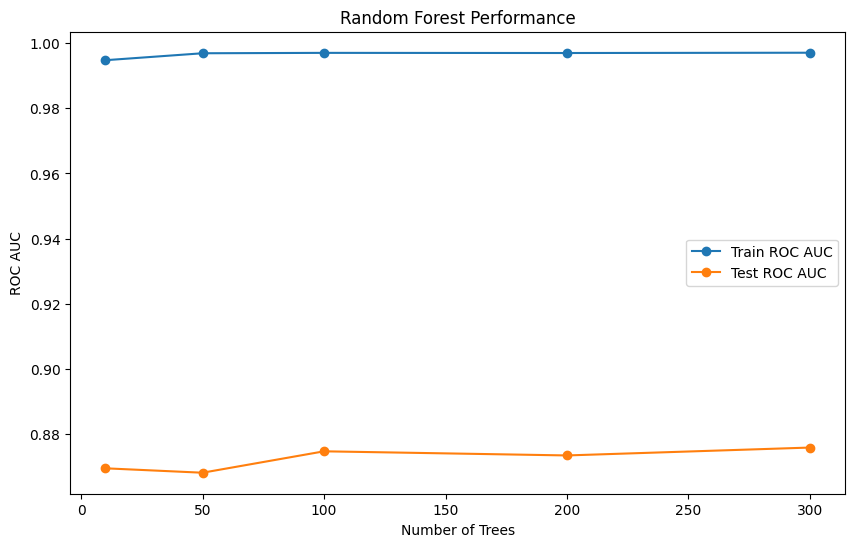

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, train_scores, label='Train ROC AUC', marker='o')
plt.plot(n_estimators, test_scores, label='Test ROC AUC', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('ROC AUC')
plt.title('Random Forest Performance')
plt.legend()
plt.show()

With how many trees the best train quality is achived? What the test quality will be?

In [51]:
best_train_idx = train_scores.index(max(train_scores))
best_test_idx = test_scores.index(max(test_scores))

print(n_estimators[best_train_idx])
print(max(test_scores))

300
0.8757717385032601


**Answer**: The best train quality was achived with 300 trees, maximum test score is 0.875.


And the same experiment using `AdaBoost` (set `algorithm='SAMME'` as hyperparameter to avoid warnings), draw conclusions

In [52]:
from sklearn.ensemble import AdaBoostClassifier
train_scores = []
test_scores = []

for n in n_estimators:
    ab = AdaBoostClassifier(n_estimators=n, algorithm='SAMME', random_state=42)
    ab.fit(X_train, y_train)

    train_scores.append(roc_auc_score(y_train, ab.predict_proba(X_train)[:, 1]))
    test_scores.append(roc_auc_score(y_test, ab.predict_proba(X_test)[:, 1]))

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

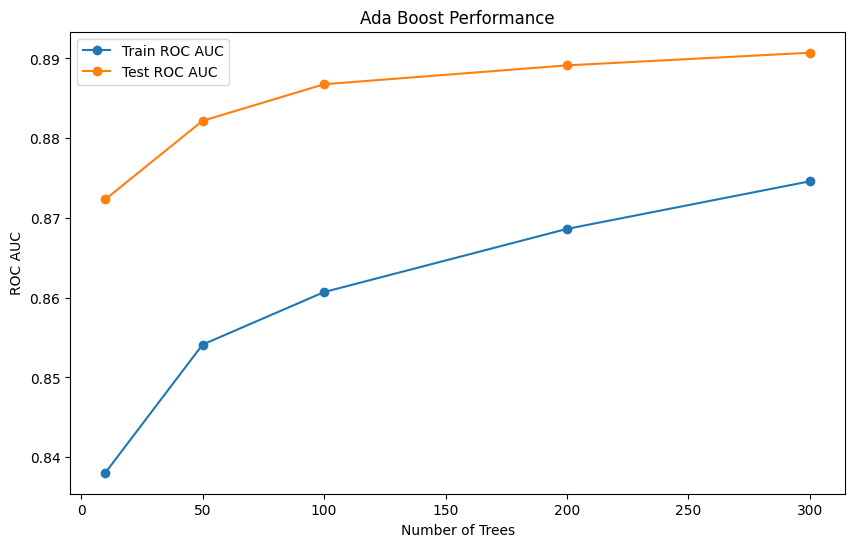

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, train_scores, label='Train ROC AUC', marker='o')
plt.plot(n_estimators, test_scores, label='Test ROC AUC', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('ROC AUC')
plt.title('Ada Boost Performance')
plt.legend()
plt.show()

With how many models the best train quality is achived? What the test quality will be?

In [54]:
best_train_idx = train_scores.index(max(train_scores))
best_test_idx = test_scores.index(max(test_scores))

print(n_estimators[best_train_idx])
print(max(test_scores))

300
0.8907160579308753


**Answer**: The best train quality was achived with 300 trees, maximum test score is 0.89.



# Task 6 (1 point)

What is the best quality achived? Which model did achive it? Whith which hyperparameters? Does it seem logical?

**Answer** Best AUC ROC score is 0.89 on test, it was reached with AdaBoost classifier. It took 300 estimators. As AdaBoost classifier is an ensemble of simple models it is the most comlicated model from our list (except random forest, but in adaboost models are not randomly selected), on each steps adaboost tries to reduce error with new model. So it seems logical that the model performes best. On the other hand we can see that random forest hit 1 for auc roc on train but that is a sign of overfitting which is pretty common for random forest
